# Checker

In [1]:
import tensorflow as tf
import numpy as np

# Проверка наличия GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

# Создание простой модели
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Создание случайных данных для обучения
x_train = np.random.rand(100, 28, 28)
y_train = np.random.randint(10, size=(100,))

# Обучение модели
model.fit(x_train, y_train, epochs=5, batch_size=16)
print("GPU is being used:", tf.test.is_gpu_available())


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Epoch 1/5
7/7 [==============================] - 1s 3ms/step - loss: 2.5574 - accuracy: 0.1200
Epoch 2/5
7/7 [==============================] - 0s 3ms/step - loss: 2.2719 - accuracy: 0.1100
Epoch 3/5
7/7 [==============================] - 0s 3ms/step - loss: 2.0802 - accuracy: 0.2300
Epoch 4/5
7/7 [==============================] - 0s 3ms/step - loss: 1.9492 - accuracy: 0.3500
Epoch 5/5
7/7 [==============================] - 0s 3ms/step - loss: 1.8660 - accuracy: 0.3200
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is being used: True


# Packages

In [2]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Reshape

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

## Цель
### - Поработать с сверточной частью нейронных сетей
### - Создать генерирующую изображения нейронную сеть (автоэнкодер/ ~~вариационный автоэнкодер~~ /GAN)


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Размер тренировочного набора: {x_train.shape}")
print(f"Размер тестового набора: {x_test.shape}")

np.unique(y_train)

Размер тренировочного набора: (60000, 28, 28)
Размер тестового набора: (10000, 28, 28)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
# Нормализуем
x_train = x_train / 255.0
x_test = x_test / 255.0

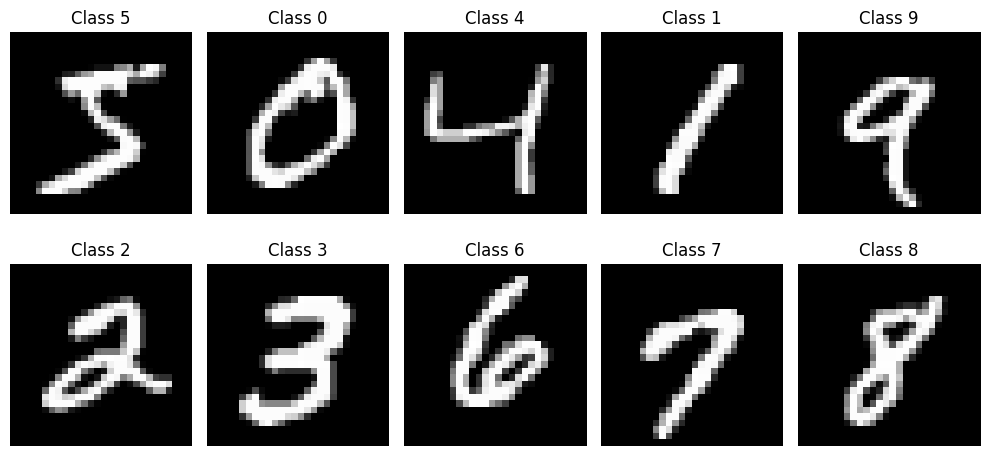

In [5]:
class_images = {}

for image, label in zip(x_train, y_train):
    if label not in class_images:
        class_images[label] = image
        if len(class_images) == 10:
            break

def plot_images(images, labels):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Class {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(list(class_images.values()), list(class_images.keys()))

# Напишем простую классифицирующую сетку.

In [6]:
def define_simple_network():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [7]:
SimpleNetwork = define_simple_network()
SimpleNetwork.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-traina

In [8]:
SimpleNetwork.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6018 - accuracy: 0.4130 - val_loss: 0.8915 - val_accuracy: 0.8044
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3229 - accuracy: 0.5176 - val_loss: 0.7588 - val_accuracy: 0.8033
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2755 - accuracy: 0.5403 - val_loss: 0.7358 - val_accuracy: 0.8067
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2441 - accuracy: 0.5605 - val_loss: 0.7179 - val_accuracy: 0.7973
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2351 - accuracy: 0.5675 - val_loss: 0.7231 - val_accuracy: 0.7938
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2168 - accuracy: 0.5758 - val_loss: 0.6996 - val_accuracy: 0.7945
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1980 - accuracy: 0.5848 - val_loss: 0.6725 - val_accuracy:

### Метрики

In [9]:
test_loss, test_acc = SimpleNetwork.evaluate(x_test, y_test, verbose=2)
print(f"\nТочность на тестовых данных: {test_acc:.4f}")

# Бинаризация меток классов
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_pred_prob = SimpleNetwork.predict(x_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")

313/313 - 1s - loss: 0.6819 - accuracy: 0.8076 - 623ms/epoch - 2ms/step

Точность на тестовых данных: 0.8076
313/313 [==============================] - 0s 1ms/step
ROC AUC Score: 0.9757


## Принцип работы достаточно ясен - мы просто подогнали веса так, чтобы статистически каждый пиксель играл в пользу того или иного класса. Основной недостаток работы этой сети в том что она НЕ смотрит на картину в целом. Чтобы понять про что идет речь, напишем сеть со сверточными слоями 

In [12]:
def define_convolution_network():
    model = Sequential()

    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
    
ConvNetwork = define_convolution_network()

In [13]:
ConvNetwork.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7788 - accuracy: 0.7467 - val_loss: 0.2340 - val_accuracy: 0.9425
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3443 - accuracy: 0.8916 - val_loss: 0.1484 - val_accuracy: 0.9601
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9105 - val_loss: 0.1260 - val_accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9191 - val_loss: 0.1134 - val_accuracy: 0.9703
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2422 - accuracy: 0.9230 - val_loss: 0.1091 - val_accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2330 - accuracy: 0.9271 - val_loss: 0.1046 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2252 - accuracy: 0.9282 - val_loss: 0.1006 - val_accuracy:

### Метрики

In [14]:
test_loss, test_acc = ConvNetwork.evaluate(x_test, y_test, verbose=2)
print(f"\nТочность на тестовых данных: {test_acc:.4f}")

y_pred_prob = ConvNetwork.predict(x_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.4f}")

313/313 - 1s - loss: 0.0920 - accuracy: 0.9748 - 679ms/epoch - 2ms/step

Точность на тестовых данных: 0.9748
313/313 [==============================] - 0s 1ms/step
ROC AUC Score: 0.9995


# Так человечество в очередной раз доказало, что сверточные слои решают, потому что несложно наблюдать бОльшие метрики при меньшем числе параметров!

# Попытаемся теперь погенерировать картинки

In [15]:
# 2354 params
def define_encoder():
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='leaky_relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='valid', activation='leaky_relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(2, activation='linear'))

    return model

enc = define_encoder()

# 10417 params
def define_decoder():
    # Здесь пошел на одну небольшую хитрость - не стал делать 6x6x16, а потом upsacle. Сделал сразу 12x12x16, чтобы чуть увеличить число параметров,
    # но даже при этом качество не лучшее
    model = Sequential()
    
    # Преобразуем вектор из 2 элементов в многомерный тензор
    model.add(Dense(12 * 12 * 16, activation='linear', input_shape=(2,)))
    model.add(Reshape((12, 12, 16)))
    
    model.add(Conv2DTranspose(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='valid', activation='leaky_relu', kernel_initializer='he_uniform'))
    
    model.add(Dropout(0.2))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2DTranspose(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='leaky_relu', kernel_initializer='he_uniform'))

    # Преобразуем в финальное изображение 28x28 с 1 каналом
    model.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

    return model

dec = define_decoder()



In [16]:
print(enc.summary())
print('\n\n\n')
print(dec.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 16)        1040      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 16)         

# Тренируем автоэнкодер

In [17]:
def define_autoencoder(encoder, decoder):
    
    model = Sequential()
    model.add(encoder)
    model.add(decoder)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model
    
autoencoder = define_autoencoder(enc, dec)

In [18]:
autoencoder.fit(
    x_train,  # входные данные
    x_train,  # выходные данные (должны быть идентичны входным)
    epochs=50,  # количество эпох
    batch_size=128,  # размер батча
    validation_data=(x_test, x_test)  # валидационные данные
)

Epoch 1/50
469/469 [==============================] - 5s 9ms/step - loss: 0.0663 - val_loss: 0.0559
Epoch 2/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0542 - val_loss: 0.0533
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0525 - val_loss: 0.0512
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0515 - val_loss: 0.0502
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0508 - val_loss: 0.0495
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0503 - val_loss: 0.0489
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0500 - val_loss: 0.0486
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0498 - val_loss: 0.0483
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0496 - val_loss: 0.0482
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0494 - val_loss: 0.0480

313/313 [==============================] - 1s 2ms/step


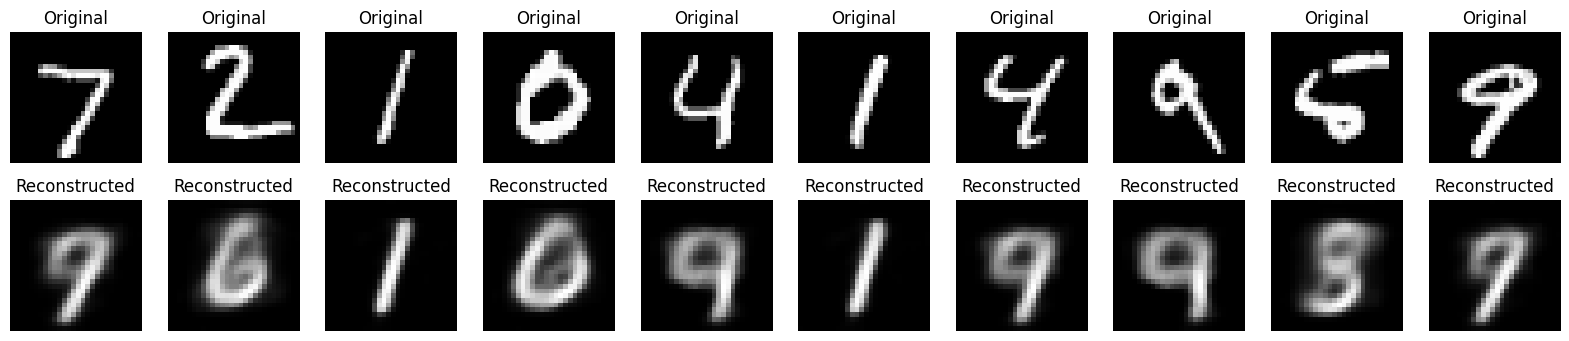

In [19]:
# Прогнозируем декодированные изображения на тестовых данных
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Оригинальное изображение
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Восстановленное изображение
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

# Посмотрим на латентное пространство

313/313 [==============================] - 0s 1ms/step


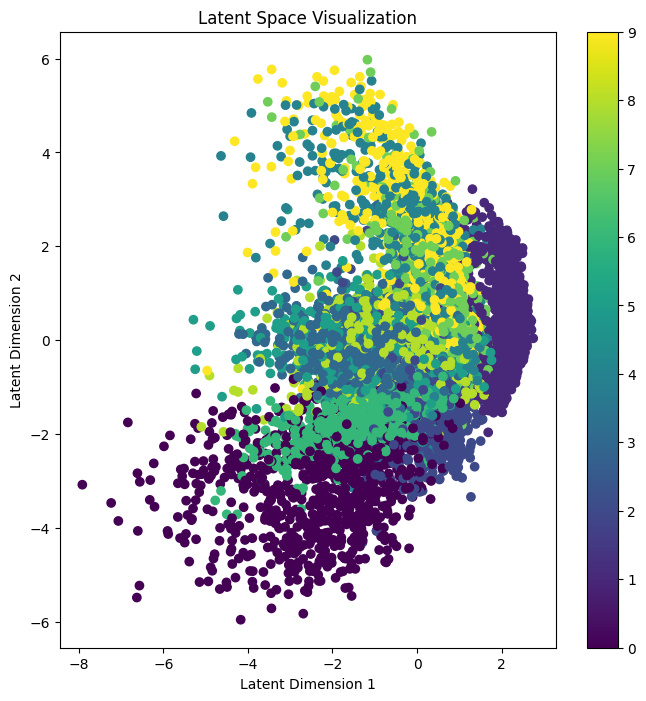

In [20]:
encoder = autoencoder.get_layer(index=0)  # или autoencoder.layers[0]

latent_space = encoder.predict(x_test)

plt.figure(figsize=(8, 8))
plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title("Latent Space Visualization")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

# Возможно стоит поэкспериментировать побольше с этими свертками, но в настоящий момент качество неудовлетворительное, на большинстве классов.
# Зато примитивная сетка справляется лучше! Пускай и на большем числе параметров...

In [21]:
def define_encoder():
    model = Sequential()
    
    model.add(Reshape((784, )))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='linear'))

    return model

def define_decoder():
    model = Sequential()

    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(784, activation='linear'))
    model.add(Reshape((28, 28, 1)))

    return model

In [22]:
enc = define_encoder()
dec = define_decoder()

In [23]:
autoencoder = define_autoencoder(enc, dec)

In [24]:
autoencoder.fit(
    x_train,  # входные данные
    x_train,  # выходные данные (должны быть идентичны входным)
    epochs=50,  # количество эпох
    batch_size=128,  # размер батча
    validation_data=(x_test, x_test)  # валидационные данные
)

Epoch 1/50
469/469 [==============================] - 3s 5ms/step - loss: 0.0528 - val_loss: 0.0474
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0462 - val_loss: 0.0444
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0433 - val_loss: 0.0424
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0417 - val_loss: 0.0413
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0406 - val_loss: 0.0402
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0397 - val_loss: 0.0395
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0390 - val_loss: 0.0392
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0385 - val_loss: 0.0387
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0381 - val_loss: 0.0382
Epoch 10/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0376 - val_loss: 0.0380

313/313 [==============================] - 0s 994us/step


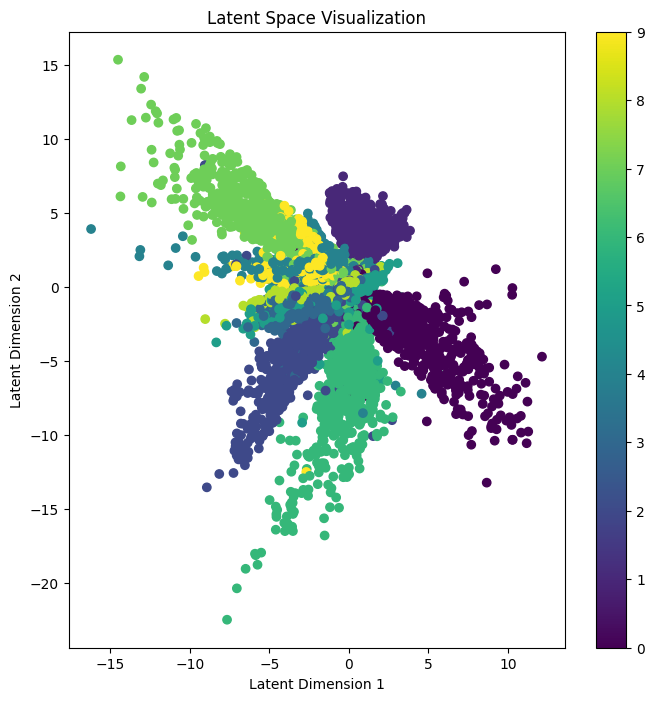

In [25]:
encoder = autoencoder.get_layer(index=0)  # или autoencoder.layers[0] если encoder был первым слоем в autoencoder

# Получение латентных представлений
latent_space = encoder.predict(x_test)

plt.figure(figsize=(8, 8))
plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title("Latent Space Visualization")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()

313/313 [==============================] - 1s 2ms/step


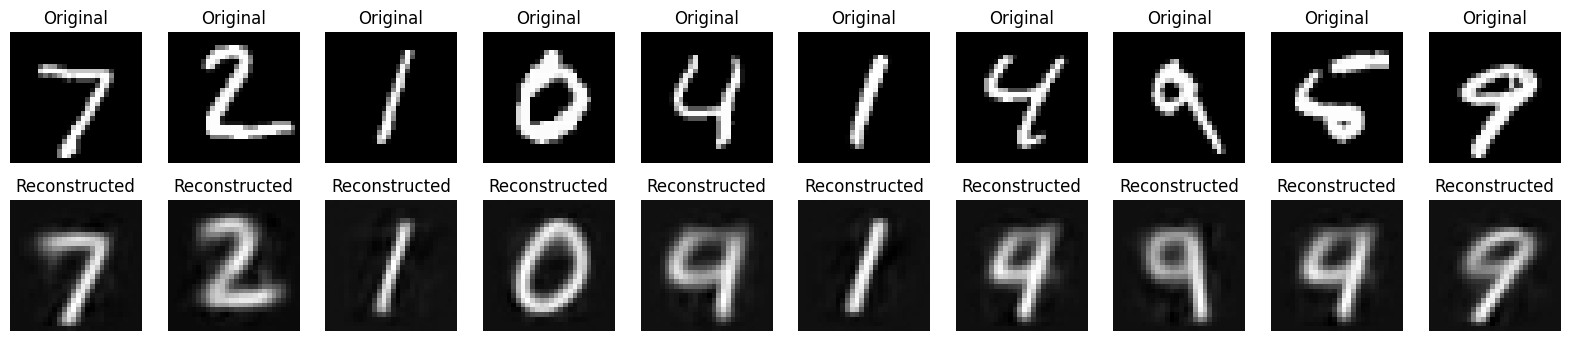

In [26]:
# Прогнозируем декодированные изображения на тестовых данных
decoded_imgs = autoencoder.predict(x_test)

# Визуализация нескольких входных и декодированных изображений
n = 10  # количество изображений для отображения
plt.figure(figsize=(20, 4))

for i in range(n):
    # Оригинальное изображение
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Восстановленное изображение
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()

# А теперь GAN со сверточными слоями

In [27]:
from keras.layers import BatchNormalization

def define_discriminator():
    model = Sequential()

    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


def define_generator(latent_dim=100):
    model = Sequential()

    model.add(Dense(7 * 7 * 8, input_dim=latent_dim))
    model.add(Reshape((7, 7, 8)))

    # Увеличиваем разрешение с 6x6 до 14x14
    model.add(Conv2DTranspose(8, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu',))
    model.add(BatchNormalization())

    # Увеличиваем разрешение с 14x14 до 28x28
    model.add(Conv2DTranspose(8, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu',))
    model.add(BatchNormalization())

    
    # Выходной слой для создания изображения 28x28x1
    model.add(Conv2D(1, kernel_size=(3, 3), padding='same', activation='sigmoid'))

    return model

In [28]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    return model

def generate_real_samples(dataset, n_samples):
    ix = np.random.randint(0, int(dataset.shape[0]), size=n_samples)
    X = dataset[ix]
    y = np.ones((n_samples, 1))
    return X, y
    
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(x_input, verbose=0)
    labels = np.zeros((n_samples, 1))
    return images, labels

def generate_latent_points(latent_dim, n_samples):
    return np.random.randn(latent_dim * n_samples).reshape(n_samples, latent_dim)

In [29]:
def train_gan(gan, generator, discriminator, dataset, latent_dim, n_epochs=5000, n_batch=128):
    half_batch = n_batch // 2

    for i in range(n_epochs):
        X_real, y_real = generate_real_samples(dataset, half_batch)
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)

        d_loss_real = discriminator.train_on_batch(X_real, y_real)[1]
        d_loss_fake = discriminator.train_on_batch(X_fake, y_fake)[1]

        X_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))

        g_loss = gan.train_on_batch(X_gan, y_gan)

        if i % 100 == 0:
            print(f"Эпоха {i}, Точность дискриминатора на реальных данных: {d_loss_real:.4f}, Точность дискриминатора на поддельных данных: {d_loss_fake:.4f}, Потеря генератора: {g_loss:.4f}")


In [30]:
latent_dim = 100
generator = define_generator(latent_dim=latent_dim)
discriminator = define_discriminator()
gan = define_gan(generator, discriminator)

train_gan(gan, generator, discriminator, x_train, latent_dim)

Эпоха 0, Точность дискриминатора на реальных данных: 0.1250, Точность дискриминатора на поддельных данных: 0.1875, Потеря генератора: 3.9806
Эпоха 100, Точность дискриминатора на реальных данных: 0.9531, Точность дискриминатора на поддельных данных: 1.0000, Потеря генератора: 0.2170
Эпоха 200, Точность дискриминатора на реальных данных: 0.8750, Точность дискриминатора на поддельных данных: 0.7812, Потеря генератора: 0.3600
Эпоха 300, Точность дискриминатора на реальных данных: 0.2812, Точность дискриминатора на поддельных данных: 0.5781, Потеря генератора: 0.8726
Эпоха 400, Точность дискриминатора на реальных данных: 0.5938, Точность дискриминатора на поддельных данных: 0.6875, Потеря генератора: 1.1385
Эпоха 500, Точность дискриминатора на реальных данных: 0.6406, Точность дискриминатора на поддельных данных: 0.4531, Потеря генератора: 1.0140
Эпоха 600, Точность дискриминатора на реальных данных: 0.5000, Точность дискриминатора на поддельных данных: 0.5000, Потеря генератора: 0.8044
Э

In [51]:
a, b = generate_fake_samples(generator, 100, 1)

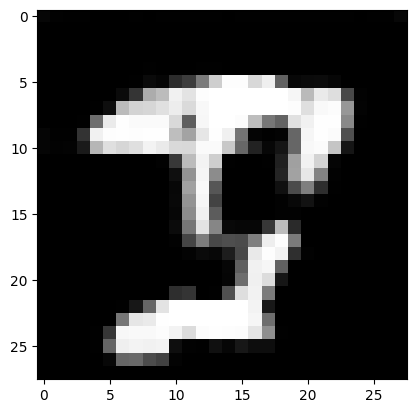

In [52]:
plt.imshow(a[0, :, :, :], cmap='gray')

In [56]:
a, b = generate_fake_samples(generator, 100, 1)

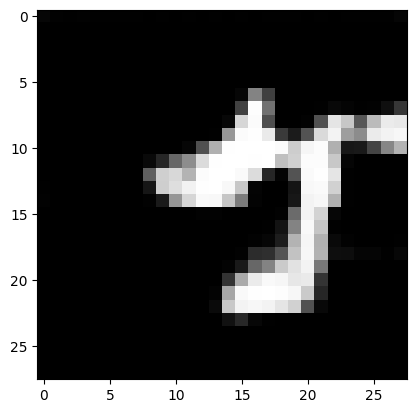

In [57]:
plt.imshow(a[0, :, :, :], cmap='gray')